# English Wikipedia page views, 2008 - 2017

**Instructions**
For this assignment, your job is to analyze traffic on English Wikipedia over time, and then document your process and the resulting dataset and visualization according to best practices for open research that were outlined for you in class.

## Step1: Data Acquisition
I am collecting data from two different Wikipedia API endpoints, the Pagecounts API and the Pageviews API.

The [Legacy Pagecounts API](https://wikitech.wikimedia.org/wiki/Analytics/AQS/Legacy_Pagecounts) has slightly different schema than the [pageview API](https://wikitech.wikimedia.org/wiki/Analytics/AQS/Pageviews).

### PageViews API


In [222]:
import requests
import pandas as pd
import io, json

## Make API call and get JSON results back
endpoint = 'https://wikimedia.org/api/rest_v1/metrics/pageviews/aggregate/{project}/{access}/{agent}/{granularity}/{start}/{end}'

headers={'User-Agent' : 'https://github.com/ceduze', 'From' : 'ceduze@uw.edu'}


#### pageviews_mobile-web

In [223]:
params = {'project' : 'en.wikipedia.org',
            'access' : 'mobile-web',
            'agent' : 'user',
            'granularity' : 'monthly',
            'start' : '2015070100',
            'end' : '2017101000'#use the first day of the following month to ensure a full month of data is collected
            }

api_call = requests.get(endpoint.format(**params))
response = api_call.json()
#print(response)

##Convert JSON to DataFrame
df_new_mobileweb = pd.DataFrame(response['items'])


#Write JSON output to file
filename = 'pageviews_mobile-web_201507-201709.json'
with io.open(filename, 'w', encoding='utf-8') as f:
  f.write(json.dumps(response, ensure_ascii=False))

#Uncomment to preview dataframe
#df_new_mobileweb

#### pageviews_mobile-app

In [224]:
params = {'project' : 'en.wikipedia.org',
            'access' : 'mobile-app',
            'agent' : 'user',
            'granularity' : 'monthly',
            'start' : '2015070100',
            'end' : '2017101000'#use the first day of the following month to ensure a full month of data is collected
            }

api_call = requests.get(endpoint.format(**params))
response = api_call.json()
#print(response)

##Convert JSON to DataFrame
df_new_mobileapp = pd.DataFrame(response['items'])

#Write JSON output to file
filename = 'pageviews_mobile-app_201507-201709.json'
with io.open(filename, 'w', encoding='utf-8') as f:
  f.write(json.dumps(response, ensure_ascii=False))

#Uncomment to preview dataframe
#df_new_mobileapp

#### pageviews_desktop

In [225]:
params = {'project' : 'en.wikipedia.org',
            'access' : 'desktop',
            'agent' : 'user',
            'granularity' : 'monthly',
            'start' : '2015070100',
            'end' : '2017101000'#use the first day of the following month to ensure a full month of data is collected
            }

api_call = requests.get(endpoint.format(**params))
response = api_call.json()
#print(response)

##Convert JSON to DataFrame
df_new_desktop = pd.DataFrame(response['items'])
df_new_desktop

#Write JSON output to file
filename = 'pageviews_desktop_201507-201709.json'
with io.open(filename, 'w', encoding='utf-8') as f:
  f.write(json.dumps(response, ensure_ascii=False))

#Uncomment to preview dataframe
#df_new_desktop

### PageCounts API

In [226]:
## Make API call and get JSON results back
endpoint = 'https://wikimedia.org/api/rest_v1/metrics/legacy/pagecounts/aggregate/{project}/{access}/{granularity}/{start}/{end}'

headers={'User-Agent' : 'https://github.com/ceduze', 'From' : 'ceduze@uw.edu'}



#### pagecounts_mobile-site

In [227]:
params = {'project' : 'en.wikipedia.org',
            'access' : 'mobile-site',            
            'granularity' : 'monthly',
            'start' : '2008010100',
            'end' : '2016081000'#use the first day of the following month to ensure a full month of data is collected
            }

api_call = requests.get(endpoint.format(**params))
response = api_call.json()
#print(response)

##Convert JSON to DataFrame
df_old_mobile = pd.DataFrame(response['items'])


#Write JSON output to file
filename = 'pagecounts_mobile-site_200801-201607.json'
with io.open(filename, 'w', encoding='utf-8') as f:
  f.write(json.dumps(response, ensure_ascii=False))

#Uncomment to preview dataframe
#df_old_mobile

#### pagecounts_desktop-site

In [228]:
## Make API call and get JSON results back
#endpoint = 'https://wikimedia.org/api/rest_v1/metrics/legacy/pagecounts/aggregate/{project}/{access}/{granularity}/{start}/{end}'

#headers={'User-Agent' : 'https://github.com/ceduze', 'From' : 'ceduze@uw.edu'}

params = {'project' : 'en.wikipedia.org',
            'access' : 'desktop-site',            
            'granularity' : 'monthly',
            'start' : '2008010100',
            'end' : '2016081000'#use the first day of the following month to ensure a full month of data is collected
            }

api_call = requests.get(endpoint.format(**params))
response = api_call.json()
#print(response)

##Convert JSON to DataFrame
df_old_desktop = pd.DataFrame(response['items'])

#Write JSON output to file
filename = 'pagecounts_desktop-site_200801-201607.json'
with io.open(filename, 'w', encoding='utf-8') as f:
  f.write(json.dumps(response, ensure_ascii=False))

#Uncomment to preview dataframe
#df_old_desktop

## Step 2: Data processing
I'm extracting the relevant columns and doing some merges and column additions.

#### Process PageCounts

In [229]:
# Extract the key columns and give friendly name
debug1 = df_old_desktop.iloc[:,[4,1]]
debug1.columns = ["timestamp", "pagecount_desktop_views" ]


# Extract the key columns and give friendly name
debug2 = df_old_mobile.iloc[:,[4,1]]
debug2.columns = ["timestamp", "pagecount_mobile_views" ]

# Merge both dataframes
debug3 = debug1.merge(debug2, on='timestamp', how='outer')

# Add Desktop and Mobile to get total
debug3["pagecount_all_views"] = debug3["pagecount_desktop_views"].add(debug3["pagecount_mobile_views"], fill_value=0)

# Extract the key columns
part_pagecounts = debug3.iloc[:,[0,3,1,2]]
#part_pagecounts

#### Process PageViews

In [230]:
# Extract the key columns and give friendly name
ph_new1 = df_new_mobileapp.iloc[:,[4,5]]
ph_new1.columns = ["timestamp", "pageview_mobile_app" ]


# Extract the key columns and give friendly name
ph_new2 = df_new_mobileweb.iloc[:,[4,5]]
ph_new2.columns = ["timestamp", "pageview_mobile_web" ]

# Merge both dataframes
ph_new3 = ph_new1.merge(ph_new2, on='timestamp', how='outer')

# Add Mobile-web and Mobile-app to get Mobile
ph_new3["pageview_mobile_views"] = ph_new3["pageview_mobile_web"].add(ph_new3["pageview_mobile_app"], fill_value=0)
ph_new3

# Extract the key columns and give friendly name
ph_new4 = df_new_desktop.iloc[:,[4,5]]
ph_new4.columns = ["timestamp", "pageview_desktop_views" ]

ph_new5 = ph_new4.merge(ph_new3, on='timestamp', how='outer')

# Add Desktop and Mobile to get total
ph_new5["pageview_all_views"] = ph_new5["pageview_desktop_views"].add(ph_new5["pageview_mobile_views"], fill_value=0)

# Extract the key columns
part_pageviews = ph_new5.iloc[:,[0,5,1,4]]
#part_pageviews




#### Merge PageViews and PageCounts

In [231]:
#Merge both parts
joint_pre = part_pagecounts.merge(part_pageviews, on='timestamp', how='outer')

#Format timestamp
API_DATE_FORMAT = '%Y%m%d%H'
joint_pre['timestamp'] = pd.to_datetime(joint_pre['timestamp'], format=API_DATE_FORMAT)

#joint_pre

## Step 3: Analysis
The goal is to visualize the data

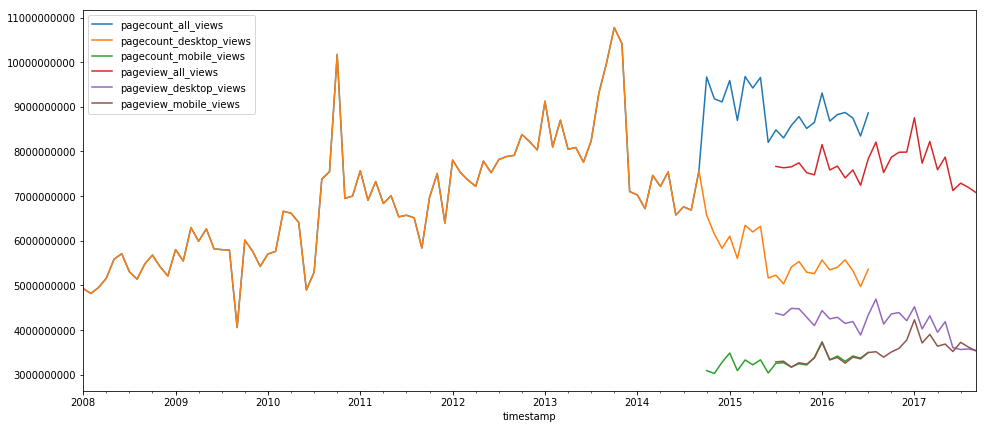

In [232]:
# Plot the chart
from IPython.core.pylabtools import figsize
joint_pre.plot(x='timestamp')

plt.ticklabel_format(style='plain', axis='y')
figsize(16,7)

plt.show()

## Step 4: Final Output File 

In [233]:
#Parse out Month and Year fields
joint_pre['Year'] = joint_pre['timestamp'].dt.year 
joint_pre['Month'] = joint_pre['timestamp'].dt.month

# Extract the key columns
final_output = joint_pre.iloc[:,[7,8,1,2,3,4,5,6]]

#Write out the final output
filename = 'en-wikipedia_traffic_200801-201709.csv'
final_output.to_csv(filename)

#final_output